In [10]:
import time
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io
import math
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline  

# Clustering example 1 - 2D data clustering

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

In [11]:
iris = load_iris()
print iris

{'target_names': array(['setosa', 'versicolor', 'virginica'], dtype='|S10'), 'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4

In [12]:
X = iris.data[:, :2]
print X.shape
print X

(150, 2)
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.1]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 

## Clustering with K-Means

In [13]:
n = 3
## initialize with K-means++, a good way of speeding up convergence
k_means = KMeans(init='k-means++', n_clusters=n, n_init=10)
## record the current time
t_km = time.time()
# start clustering!
k_means.fit(X)
## get the time to finish clustering
t_fin_km = time.time() - t_km

## Clustering with DBSCAN

In [21]:
t_db = time.time()
db = DBSCAN(eps=0.4, min_samples=5).fit(X)
t_fin_db = time.time() - t_db

## Compare the two algorithms

In [22]:
print t_fin_km, t_fin_db

0.273131132126 0.0285859107971


### K_Means results

In [23]:
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)
ft = (k_means_labels, k_means_cluster_centers, k_means_labels_unique)
print "labels:\n %s, \n cluster centers:\n %s,\n  unique labels:\n %s" % ft

labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2], 
 cluster centers:
 [[5.006      3.418     ]
 [6.81276596 3.07446809]
 [5.77358491 2.69245283]],
  unique labels:
 [0 1 2]


### DBSCAN results

In [24]:
db_labels = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

db_labels_unique = np.unique(db_labels)

print "labels:\n %s, \n  unique labels:\n %s" % (db_labels, db_labels_unique)

labels:
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0], 
  unique labels:
 [-1  0]


### K-Means visualization

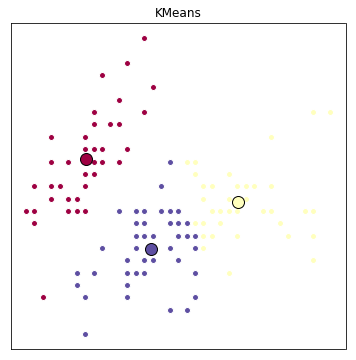

In [25]:
fig = plt.figure(figsize=(6, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, n))

ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(n), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='o', markersize=6)
    ax.plot(cluster_center[0], cluster_center[1], 'o',
            markerfacecolor=col, markeredgecolor='k', markersize=12)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

### DBSCAN visualization

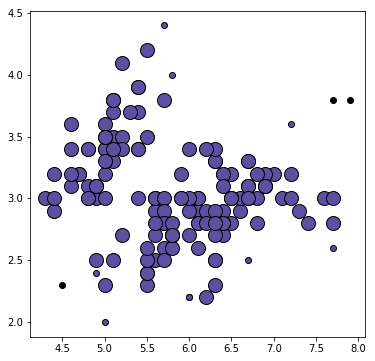

In [26]:
fig = plt.figure(figsize=(6, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(db_labels_unique)))
for k, col in zip(db_labels_unique, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
    class_member_mask = (db_labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)
plt.show()

# Clustering example 2 - 3D data clustering

In [27]:
X = iris.data[:, :3]
print X.shape

(150, 3)


## Clustering with K-Means

In [28]:
n = 3
## initialize with K-means++, a good way of speeding up convergence
k_means = KMeans(init='k-means++', n_clusters=n, n_init=10)
## record the current time
t_km = time.time()
# start clustering!
k_means.fit(X)
## get the time to finish clustering
t_fin_km = time.time() - t_km

## Clustering with DBSCAN

In [29]:
t_db = time.time()
db = DBSCAN(eps=0.4, min_samples=5).fit(X)
t_fin_db = time.time() - t_db

## Compare the two algorithms

In [30]:
print t_fin_km, t_fin_db

0.164557933807 0.0112988948822


### K-Means visualization vs ground truth

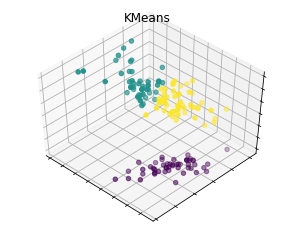

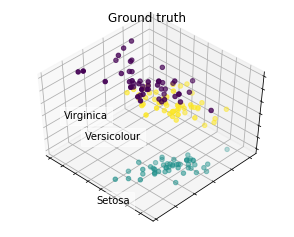

In [31]:
fig = plt.figure(1, figsize=(4, 3))
colors = plt.cm.Spectral(np.linspace(0, 1, n))

ax1 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=k_means_labels.astype(np.float))
ax1.set_title('KMeans')
ax1.w_xaxis.set_ticklabels([])
ax1.w_yaxis.set_ticklabels([])
ax1.w_zaxis.set_ticklabels([])


y = iris.target
fig = plt.figure(2, figsize=(4, 3))
ax2 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)



for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax2.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax2.set_title('Ground truth')
ax2.w_xaxis.set_ticklabels([])
ax2.w_yaxis.set_ticklabels([])
ax2.w_zaxis.set_ticklabels([])
plt.show()

### DBSCAN visualization vs ground truth

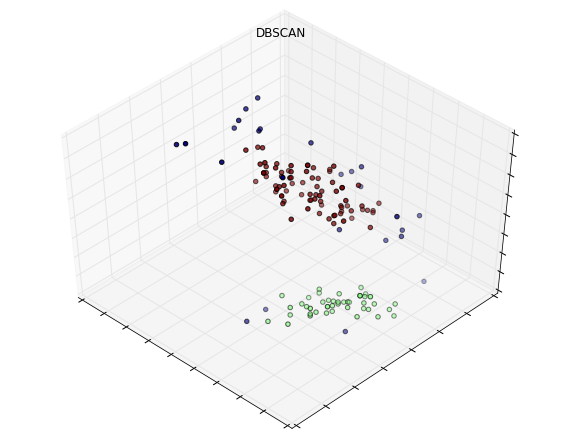

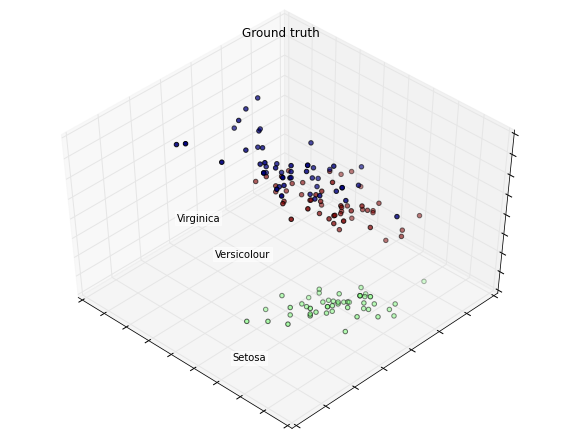

In [53]:
db_labels = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

db_labels_unique = np.unique(db_labels)

fig = plt.figure(1, figsize=(8, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, n))

ax1 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=db_labels.astype(np.float))
ax1.set_title('DBSCAN')
ax1.w_xaxis.set_ticklabels([])
ax1.w_yaxis.set_ticklabels([])
ax1.w_zaxis.set_ticklabels([])


y = iris.target
fig = plt.figure(2, figsize=(8, 6))
ax2 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)



for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax2.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax2.set_title('Ground truth')
ax2.w_xaxis.set_ticklabels([])
ax2.w_yaxis.set_ticklabels([])
ax2.w_zaxis.set_ticklabels([])
plt.show()

# Clustering example 3 - Image data

In [88]:
class KmeansPP:
    def __init__(self, data, k, maxIter = 1e6):
        self.data = data
        self.k= k
        self.maxIter = maxIter
        self.centers = np.zeros((k, data.shape[1]))
        self.numData = data.shape[0]
        self.cluster = None
        self.Iter = 0
        self.loss = float('inf')
    def kppInitilize(self):
        index = np.random.choice(self.numData, 1);
        self.centers[0,:]=self.data[index,:]
        for i in range(self.k - 1):
            dis = np.zeros((self.numData, len(self.centers)))
            for j in range(len(self.centers)):
                dis[:,j] = np.linalg.norm(self.data - self.centers[j], axis=1)
            dis_min = np.amin(dis,axis = 1)
            dis_min2 = np.square(dis_min)
            prob = dis_min2 / np.linalg.norm(dis_min2)
#             print prob
            index = np.random.choice(self.numData, 1, list(prob))
            self.centers[i+1,:] = self.data[index,:]
            
    def hasConverged(self, newCenters):
        return (self.centers==newCenters).all()
    
    def findClusters(self):
        dis = np.zeros((self.numData, self.k))
        for j in range(self.k):
            dis[:,j] = np.linalg.norm(self.data - self.centers[j], axis=1)
        self.cluster = np.argmin(dis, axis=1)
    
    def reEvaluateCenters(self):
        new_c = np.zeros((self.k, self.data.shape[1]))
        for j in range(self.k):
            new_c[j,:] = np.mean(self.data[self.cluster[:] == j,:], axis = 0)
        return new_c
    
    def calculateLoss(self):
        dis = np.zeros((self.numData, self.k))
        for j in range(self.k):
            dis[:,j] = np.linalg.norm(self.data - self.centers[j], axis=1)
        self.loss = np.sum(np.min(dis, axis=1))
    
    def train(self):
        self.kppInitilize()
        self.findClusters()
        newCenters = self.reEvaluateCenters()
        while (not self.hasConverged(newCenters)) and self.Iter <= self.maxIter:
#             print self.Iter
            self.Iter += 1
            self.centers = newCenters
            self.findClusters()
            newCenters = self.reEvaluateCenters()
        self.calculateLoss()

In [89]:
images = scipy.io.loadmat('images.mat')['images']
print images.shape

(28, 28, 60000)


In [90]:
X_new = []
for i in range(images.shape[2]):
    a = images[...,i]
    b = a.flatten()
    X_new.append(b)
X_new = np.asarray(X_new).astype(float)

## 5 clusters

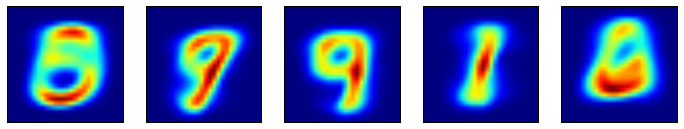

In [91]:
kpp = KmeansPP(X_new,5,100)
kpp.train()
f, axarr = plt.subplots(1, 5,figsize=(12,3))
for i in range(5):
    axarr[i].imshow(kpp.centers[i].reshape(28,28))
    axarr[i].get_xaxis().set_visible(False)
    axarr[i].get_yaxis().set_visible(False)

## 10 clusters

/Users/Mogeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Mogeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Mogeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


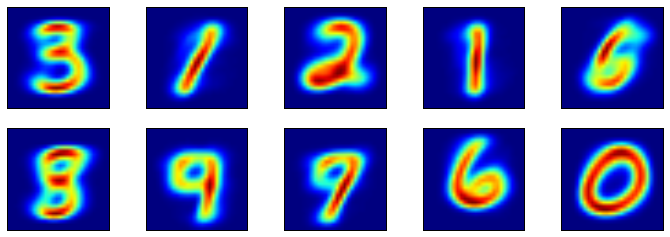

In [94]:
kpp = KmeansPP(X_new,10,20)
kpp.train()
f, axarr = plt.subplots(2, 5,figsize=(12,4))
for i in range(10):
    axarr[math.floor(i/5), i - 5 * math.floor(i/5)].imshow(kpp.centers[i].reshape(28,28))
    axarr[math.floor(i/5), i - 5 * math.floor(i/5)].get_xaxis().set_visible(False)
    axarr[math.floor(i/5), i - 5 * math.floor(i/5)].get_yaxis().set_visible(False)

## 20 clusters

/Users/Mogeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Mogeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Mogeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


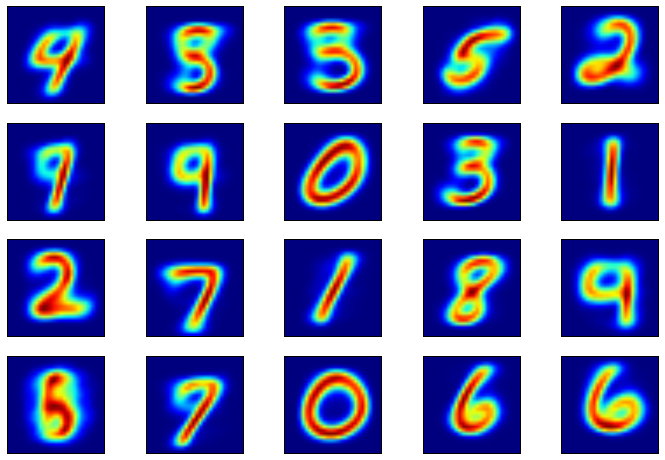

In [95]:
kpp = KmeansPP(X_new,20,100)
kpp.train()
f, axarr = plt.subplots(4, 5, figsize=(12,8))
for i in range(20):
    axarr[math.floor(i/5), i - 5 * math.floor(i/5)].imshow(kpp.centers[i].reshape(28,28))
    axarr[math.floor(i/5), i - 5 * math.floor(i/5)].get_xaxis().set_visible(False)
    axarr[math.floor(i/5), i - 5 * math.floor(i/5)].get_yaxis().set_visible(False)

# More:
### Clustering example 4 - Document clustering http://brandonrose.org/clustering
### Clustering example 5 - Trajectory clustering, will be discussed later